Data Mining Project
Group 8 
Pranit Kolhe & Parva Parikh

In [1]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--","NaN"]
!pip install --upgrade openpyxl

In [2]:
!pip install dmba
!pip install mord

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import statsmodels.api as sm
from mord import LogisticIT
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

In [4]:
from sklearn.decomposition import PCA

In [5]:
from sklearn.neural_network import MLPClassifier

In [6]:
df = pd.read_csv( "adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
df['Income Status']=0
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'Income Status'],
      dtype='object')

In [8]:
i=0
while i<df.shape[0]:
  if df['income'].loc[i]=='>50K':
    df['Income Status'].loc[i]=1
  else:
    df['Income Status'].loc[i]=0
  i+=1

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [9]:
df.replace('?',np.NaN,inplace=True)

In [10]:
null_list=df.isnull().sum()
sum_null=sum(null_list)
sum_null

4262

In [11]:
number_of_elements=df.shape[0]*df.shape[1] #number_of_elements
percentage_of_nulls=(sum_null*100)/(number_of_elements)
print('there are '+str(percentage_of_nulls)+'% null values in the dataset\n')
print('hence we can drop the nulls since they constitute only a small portion')

there are 0.8180799115506281% null values in the dataset

hence we can drop the nulls since they constitute only a small portion


In [12]:
df.dropna(inplace=True)

In [13]:
df.to_csv('adult_cleaned.csv')

In [14]:
income_stat=df.groupby(['education','Income Status'])['education','Income Status'].size()
income_stat

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_15404/2886557111.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  income_stat=df.groupby(['education','Income Status'])['education','Income Status'].size()


education     Income Status
10th          0                 761
              1                  59
11th          0                 989
              1                  59
12th          0                 348
              1                  29
1st-4th       0                 145
              1                   6
5th-6th       0                 276
              1                  12
7th-8th       0                 522
              1                  35
9th           0                 430
              1                  25
Assoc-acdm    0                 752
              1                 256
Assoc-voc     0                 963
              1                 344
Bachelors     0                2918
              1                2126
Doctorate     0                  95
              1                 280
HS-grad       0                8223
              1                1617
Masters       0                 709
              1                 918
Preschool     0                  45


To understand the shape of data

In [15]:
x=df[df['age']<30]
y=x.groupby(['sex','Income Status'])['age','sex','Income Status'].size()
pd.DataFrame(y)

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_15404/4067052542.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y=x.groupby(['sex','Income Status'])['age','sex','Income Status'].size()


0
sex    Income Status      
Female 0              3392
       1               121
Male   0              4898
       1               373

<AxesSubplot:xlabel='Income Status', ylabel='count'>

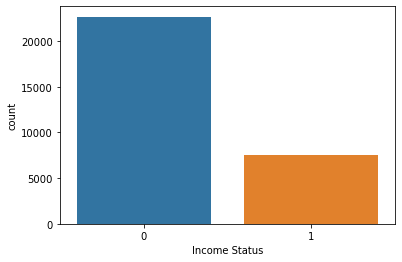

In [16]:
bar=df.groupby('Income Status').size()
sns.countplot(x='Income Status',data=df)

In [17]:
df.shape

(30162, 16)

In [18]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Income Status
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,0


In [19]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Income Status
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [20]:
df.groupby('income').describe()

age                                                      fnlwgt  \
          count      mean        std   min   25%   50%   75%   max    count   
income                                                                        
<=50K   22654.0  36.60806  13.464631  17.0  26.0  34.0  45.0  90.0  22654.0   
>50K     7508.0  43.95911  10.269633  19.0  36.0  43.0  51.0  90.0   7508.0   

                       ... hours.per.week       Income Status                 \
                 mean  ...            75%   max         count mean  std  min   
income                 ...                                                     
<=50K   190338.646729  ...           40.0  99.0       22654.0  0.0  0.0  0.0   
>50K    188149.962174  ...           50.0  99.0        7508.0  1.0  0.0  1.0   

                            
        25%  50%  75%  max  
income                      
<=50K   0.0  0.0  0.0  0.0  
>50K    1.0  1.0  1.0  1.0  

[2 rows x 56 columns]

Zero values in capital gain 

In [21]:
count = (df['capital.gain'] == 0).sum()
print('Count of zeros in Column : ', count)

Count of zeros in Column :  27624


In [22]:
# dropping capital gain column as it has 91% zeo values and rest don't make sense 
df.drop(['capital.gain'],axis=1)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.loss,hours.per.week,native.country,income,Income Status
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,4356,18,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,3900,40,United-States,<=50K,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,3770,45,United-States,<=50K,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,3770,40,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,40,United-States,<=50K,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,38,United-States,<=50K,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,40,United-States,>50K,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,40,United-States,<=50K,0


In [23]:
#age statistics
[df['age'].mean(),
df['age'].std(),
 df['age'].var()]

[38.437901995888865, 13.134664776856322, 172.51941880039016]

In [24]:
#hours statistics
[df['hours.per.week'].mean(),
df['hours.per.week'].std(),
df['hours.per.week'].var()]

[40.93123798156621, 11.979984229273326, 143.52002213363758]

In [25]:
#capital loss statistics
[df['capital.loss'].mean(),
df['capital.loss'].std(),
df['capital.loss'].var()]

[88.37248856176646, 404.29837048617463, 163457.17237777612]

<AxesSubplot:xlabel='hours.per.week', ylabel='sex'>

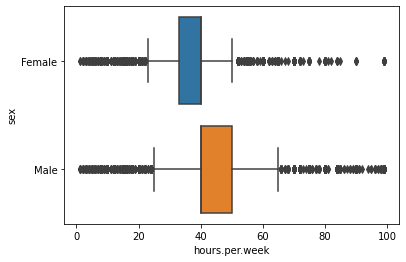

In [26]:
sns.boxplot(x=df['hours.per.week'],y=df['sex'])

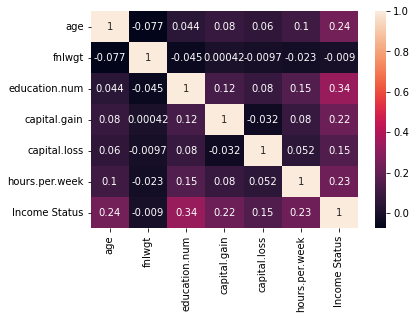

In [27]:
#correlation coefficients in the dataframe
corr= df.corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels= corr.columns,annot=True)

In [28]:
#male and female count grouped by incomes
pd.DataFrame(df.groupby(['sex','income'])['sex'].size())

sex
sex    income       
Female <=50K    8670
       >50K     1112
Male   <=50K   13984
       >50K     6396

Scatter plot for age vs working hours 

No handles with labels found to put in legend.


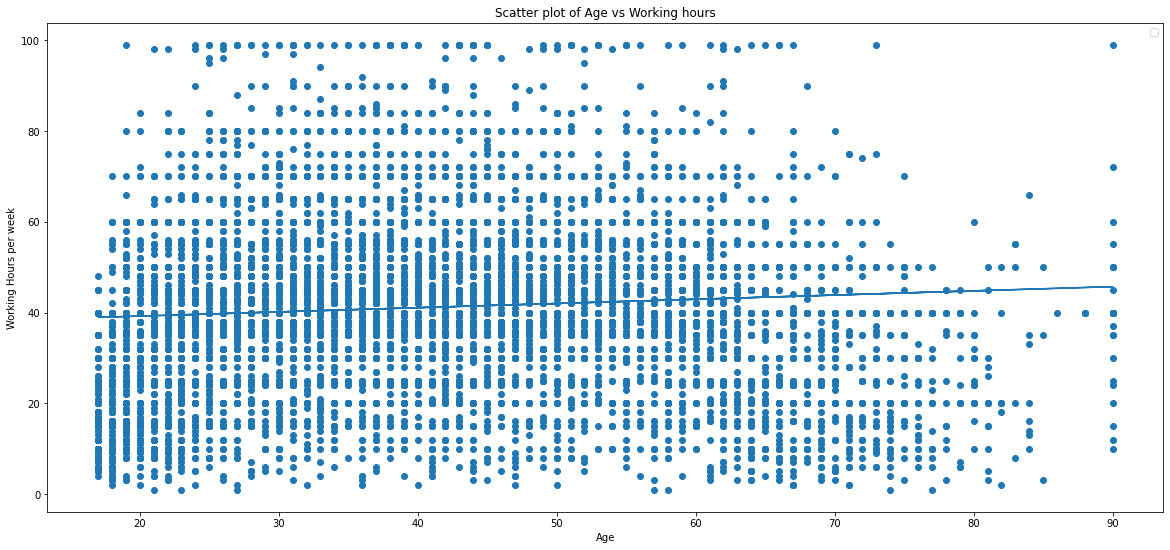

In [29]:
from matplotlib import pyplot as plt 
fig,ax = plt.subplots(figsize=(20,9))
ax.set_xlabel('Age')
ax.set_ylabel('Working Hours per week')
ax.scatter(df['age'],df['hours.per.week'])
plt.title('Scatter plot of Age vs Working hours')
z = np.polyfit(df['age'],df['hours.per.week'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(df['age'], p(df['age']))
plt.legend()
plt.show()

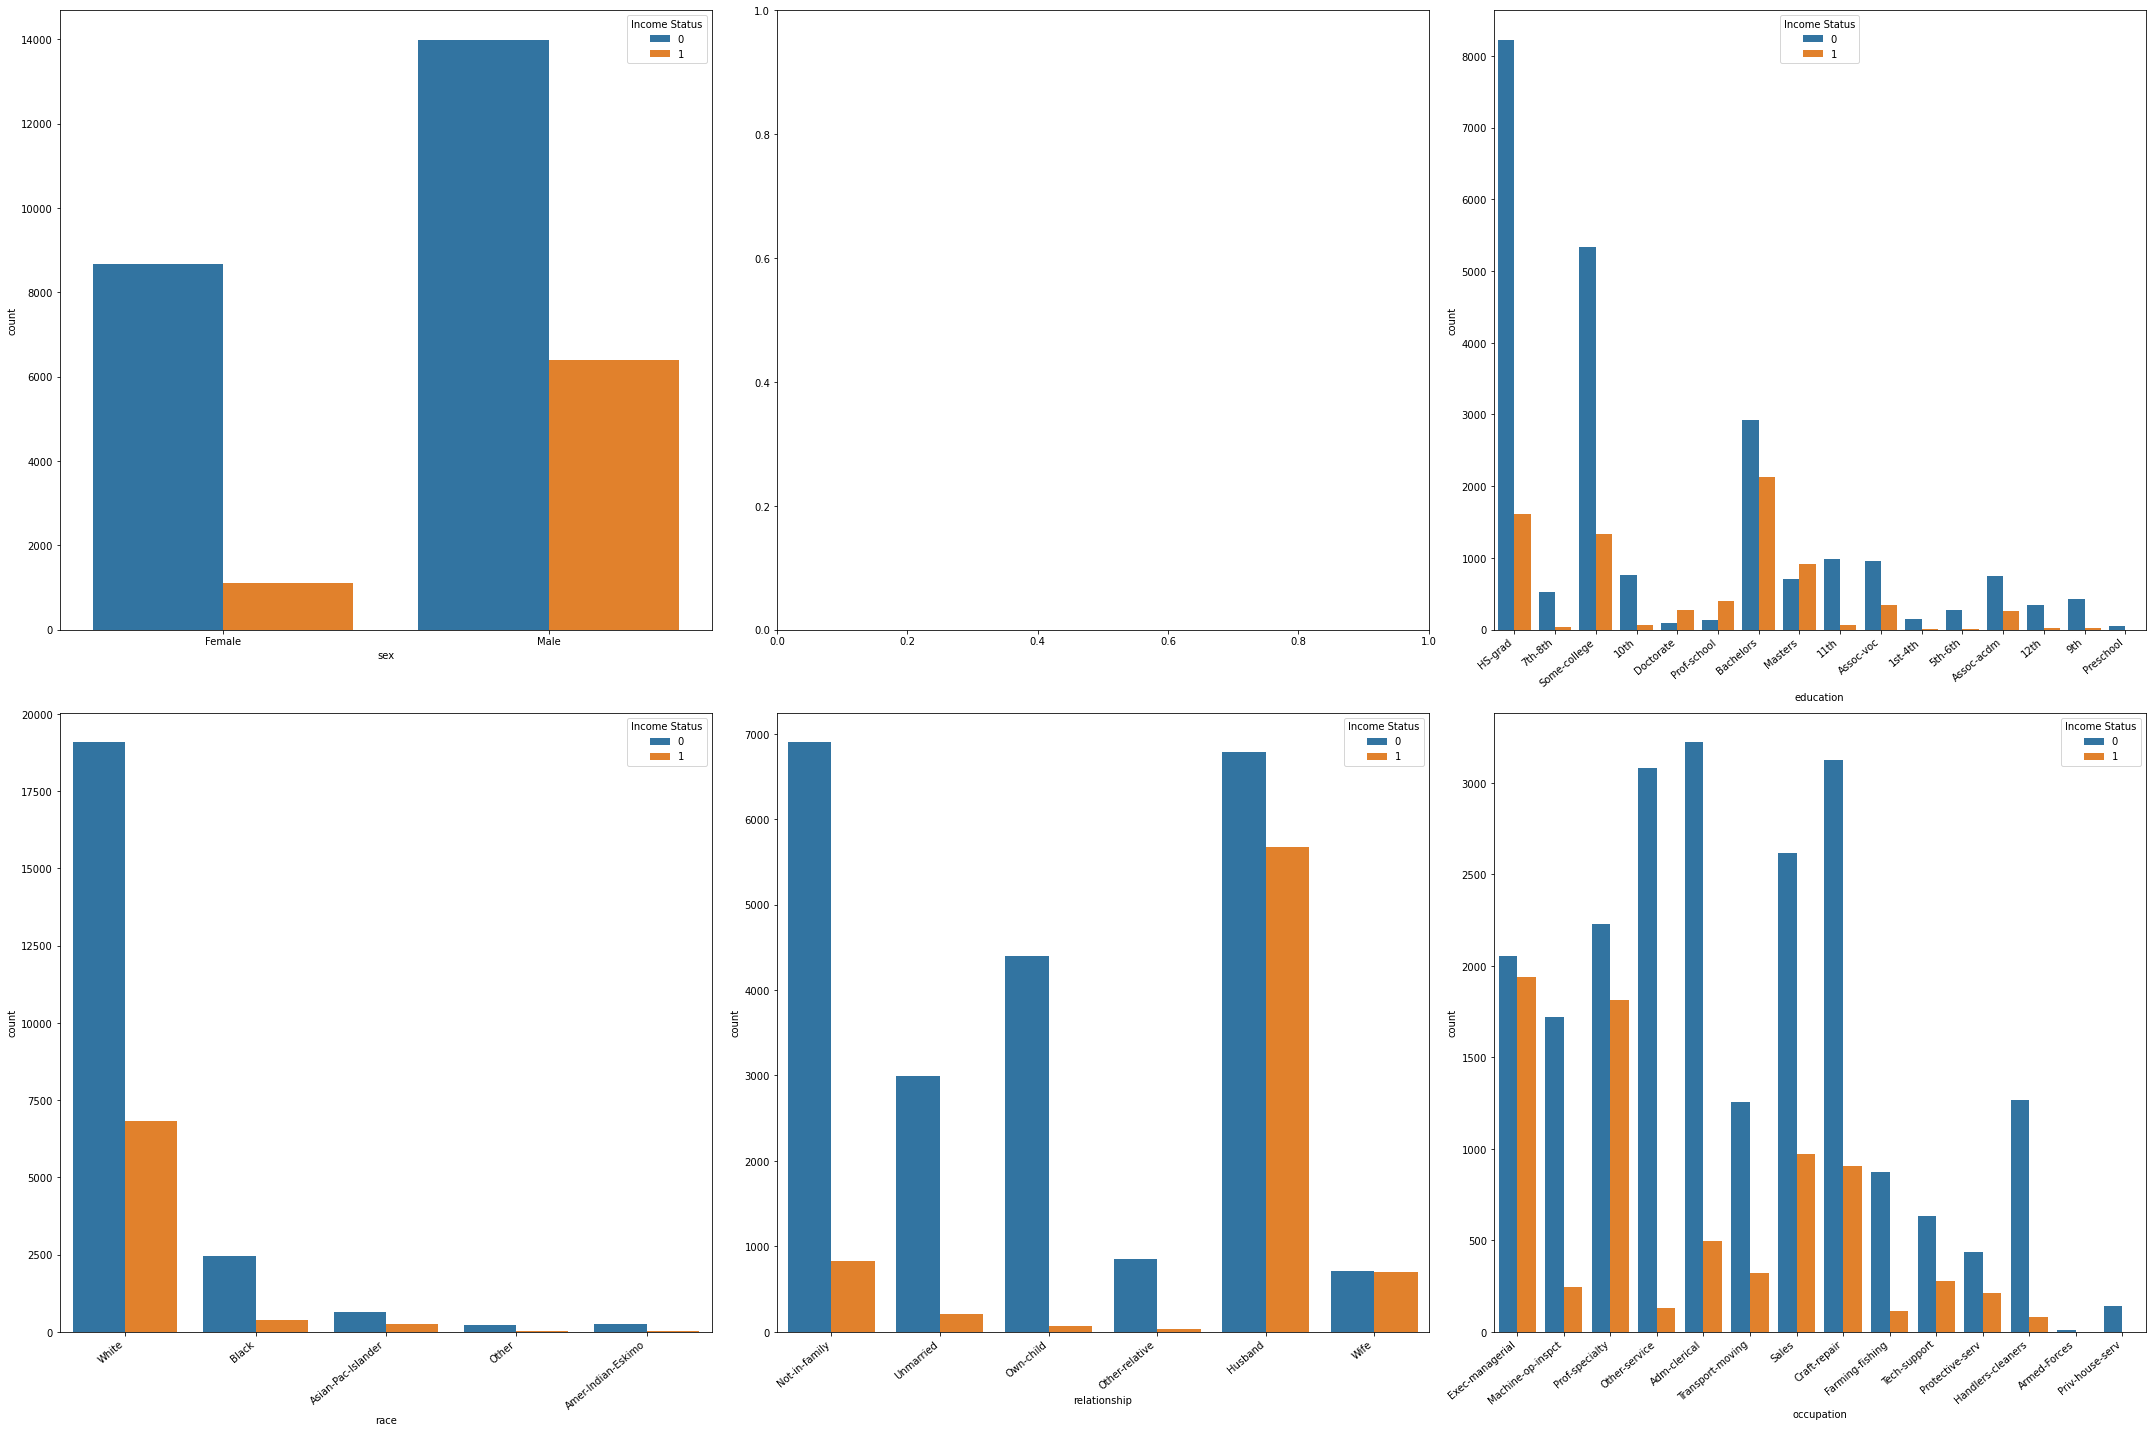

In [30]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(30,20))
sns.countplot(x="sex", data=df,hue="Income Status",ax = ax[0][0])
cp2 = sns.countplot(x="education", data=df,hue="Income Status",ax = ax[0][2])
cp2.set_xticklabels(cp2.get_xticklabels(), rotation=40, ha="right")
cp3 = sns.countplot(x="race", data=df,hue="Income Status",ax = ax[1][0])
cp3.set_xticklabels(cp3.get_xticklabels(), rotation=40, ha="right")
cp4 = sns.countplot(x="relationship", data=df,hue="Income Status", ax = ax[1][1])
cp4.set_xticklabels(cp4.get_xticklabels(), rotation=40, ha="right")
cp5 = sns.countplot(x="occupation", data=df,hue="Income Status",ax= ax[1][2])
cp5.set_xticklabels(cp5.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()

In [31]:
import pandas as pd 
import numpy as np   
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
import pandas as pd
df_cleaned=pd.read_csv('adult_cleaned.csv')
df_cleaned.drop(columns=['capital.gain'],inplace=True)
cat_var=['workclass', 'education',
 'marital.status', 'occupation', 'relationship', 'race',
'sex','native.country'] #list of categorical variables
all_pred=['age', 'workclass', 'fnlwgt', 'education',
       'education.num', 'marital.status', 'occupation', 'relationship', 'race',
       'sex',  'capital.loss', 'hours.per.week',
       'native.country']

In [33]:
#checking if the correlation among precdictors exceeds 0.7
dummy_df=pd.get_dummies(df_cleaned[cat_var])
dfcleaned_corr=np.absolute(df_cleaned[all_pred].join(dummy_df).corr())
x=list(dfcleaned_corr.columns)

In [34]:
dfcleaned_corr

,age,fnlwgt,education.num,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
age,1.000000,0.076511,0.043526,0.060165,0.101599,0.056626,0.068256,0.210491,0.111039,0.150429,...,0.001062,0.007836,0.000024,0.001923,0.007879,0.004940,0.007868,0.016259,0.017775,0.000657
fnlwgt,0.076511,1.000000,0.044992,0.009750,0.022886,0.006932,0.003520,0.046589,0.025496,0.041453,...,0.014020,0.007121,0.003055,0.010598,0.001615,0.001241,0.000413,0.083390,0.010761,0.005707
education.num,0.043526,0.044992,1.000000,0.079646,0.152522,0.058244,0.097378,0.165069,0.078843,0.010605,...,0.043058,0.042083,0.001815,0.017812,0.049129,0.008183,0.017134,0.127207,0.010953,0.001661
capital.loss,0.060165,0.009750,0.079646,1.000000,0.052417,0.010380,0.014727,0.036377,0.030956,0.020221,...,0.007343,0.004560,0.004175,0.005677,0.005679,0.005191,0.008849,0.015119,0.000344,0.005036
hours.per.week,0.101599,0.022886,0.152522,0.052417,1.000000,0.005229,0.001612,0.095533,0.126254,0.087835,...,0.003162,0.012015,0.000689,0.014328,0.000305,0.012846,0.007566,0.010673,0.010381,0.006983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native.country_Thailand,0.004940,0.001241,0.008183,0.005191,0.012846,0.004266,0.006441,0.008144,0.018052,0.008065,...,0.000798,0.001430,0.000454,0.001154,0.000887,1.000000,0.000580,0.076390,0.001095,0.000547
native.country_Trinadad&Tobago,0.007868,0.000413,0.017134,0.008849,0.007566,0.004390,0.001255,0.002164,0.002630,0.002420,...,0.000821,0.001472,0.000467,0.001187,0.000913,0.000580,1.000000,0.078606,0.001127,0.000563
native.country_United-States,0.016259,0.083390,0.127207,0.015119,0.010673,0.017541,0.032937,0.049809,0.007350,0.014520,...,0.108062,0.193727,0.061442,0.156254,0.120121,0.076390,0.078606,1.000000,0.148334,0.074108
native.country_Vietnam,0.017775,0.010761,0.010953,0.000344,0.010381,0.000004,0.003952,0.009369,0.004973,0.003405,...,0.001549,0.002777,0.000881,0.002240,0.001722,0.001095,0.001127,0.148334,1.000000,0.001062


In [35]:
df_cleaned.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education.num', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'capital.loss', 'hours.per.week', 'native.country', 'income',
       'Income Status'],
      dtype='object')

In [36]:
#i=columns, j=rows
cor7=dfcleaned_corr[dfcleaned_corr>0.7]
cor7['relationship_Husband']#these are the diagonal values, all other are weakly correlated
#hence we cannot drop predictors based on their correlation with each other

age                              NaN
fnlwgt                           NaN
education.num                    NaN
capital.loss                     NaN
hours.per.week                   NaN
                                  ..
native.country_Thailand          NaN
native.country_Trinadad&Tobago   NaN
native.country_United-States     NaN
native.country_Vietnam           NaN
native.country_Yugoslavia        NaN
Name: relationship_Husband, Length: 103, dtype: float64

In [37]:
#predictors, outcome correlation
dummy_df=pd.get_dummies(df_cleaned[cat_var])
df_out=df_cleaned.join(dummy_df)
pd.set_option('display.max_rows', None)
pd.DataFrame(np.absolute(df_out.corr()['Income Status']<0.01))

,Income Status
Unnamed: 0,True
age,False
fnlwgt,True
education.num,False
capital.loss,False
hours.per.week,False
Income Status,False
workclass_Federal-gov,False
workclass_Local-gov,False
workclass_Private,True


In [38]:
#we drop the attributes with majority True for the above condition
#education and education.num are repetitive, we drop one of them
df_cleaned.drop(['Unnamed: 0', 'fnlwgt','relationship','education','race'],axis=1,inplace=True)

In [39]:
df_cleaned.drop(['native.country'],axis=1,inplace=True)

In [40]:
df_cleaned.drop(['income'],axis=1,inplace=True)

In [41]:
df_cleaned.columns

Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'sex', 'capital.loss', 'hours.per.week', 'Income Status'],
      dtype='object')

In [42]:
df_cleaned.head()

,age,workclass,education.num,marital.status,occupation,sex,capital.loss,hours.per.week,Income Status
0,82,Private,9,Widowed,Exec-managerial,Female,4356,18,0
1,54,Private,4,Divorced,Machine-op-inspct,Female,3900,40,0
2,41,Private,10,Separated,Prof-specialty,Female,3900,40,0
3,34,Private,9,Divorced,Other-service,Female,3770,45,0
4,38,Private,6,Separated,Adm-clerical,Male,3770,40,0


In [43]:
df_cleaned_dummy=pd.get_dummies(df_cleaned)
df_cleaned_dummy.head()

,age,education.num,capital.loss,hours.per.week,Income Status,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,sex_Female,sex_Male
0,82,9,4356,18,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,54,4,3900,40,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,41,10,3900,40,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,34,9,3770,45,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,38,6,3770,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

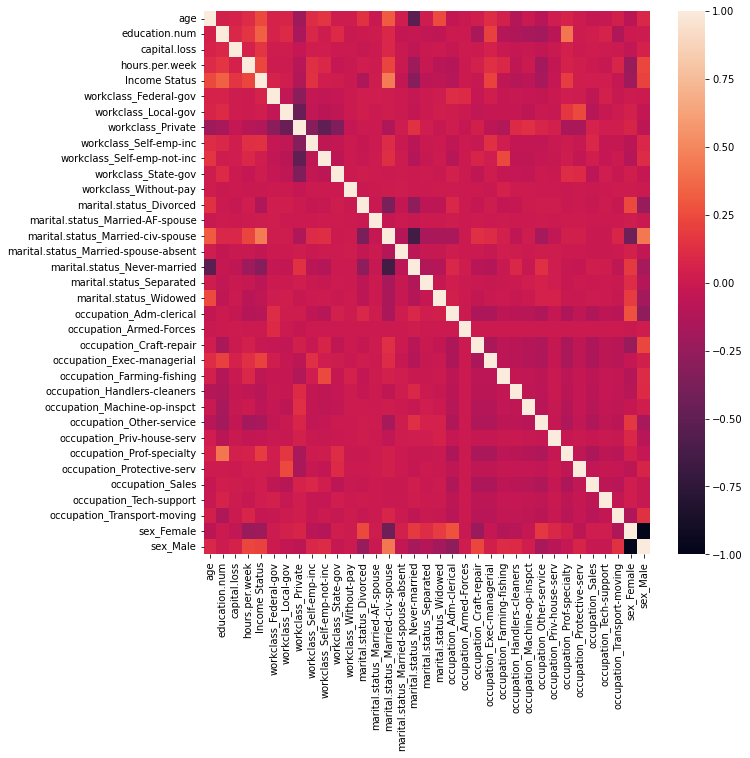

In [44]:
#heatmap of dataframe including dummy variables
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_cleaned_dummy.corr())

# Linear Regression

In [45]:
df_cleaned.head()

,age,workclass,education.num,marital.status,occupation,sex,capital.loss,hours.per.week,Income Status
0,82,Private,9,Widowed,Exec-managerial,Female,4356,18,0
1,54,Private,4,Divorced,Machine-op-inspct,Female,3900,40,0
2,41,Private,10,Separated,Prof-specialty,Female,3900,40,0
3,34,Private,9,Divorced,Other-service,Female,3770,45,0
4,38,Private,6,Separated,Adm-clerical,Male,3770,40,0


In [46]:
from sklearn.preprocessing import LabelEncoder
lenc=LabelEncoder()

In [47]:
list1=df_cleaned.columns
list2=['workclass', 'marital.status', 'occupation',
       'sex']
df_cleaned[list2]=df_cleaned[list2].astype('category')
df_cleaned_copy=df_cleaned.copy()

In [48]:
for l in list2:
  df_cleaned_copy[l]=lenc.fit_transform(df_cleaned_copy[l])

<AxesSubplot:>

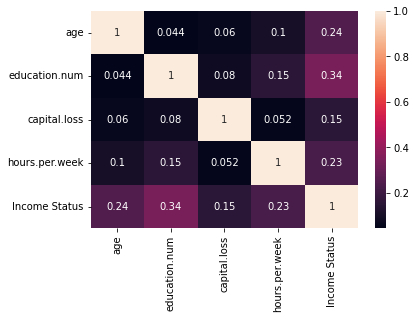

In [49]:
sns.heatmap(df_cleaned.corr(),annot=True)

In [50]:
df_linear=df_cleaned_copy.drop(df_cleaned[['workclass']],axis=1) #dataframe for linear reg

In [51]:
df_linear.columns

Index(['age', 'education.num', 'marital.status', 'occupation', 'sex',
       'capital.loss', 'hours.per.week', 'Income Status'],
      dtype='object')

In [52]:
lrtrain_x,lrtest_x,lrtrain_y,lrtest_y=train_test_split(df_linear[['age', 'education.num', 'marital.status', 'occupation', 'sex',
       'capital.loss', 'hours.per.week']],df_linear['Income Status'],test_size=0.25,random_state=1)

In [53]:
x=['age', 'education.num', 'marital.status', 'occupation', 'sex',
       'capital.loss', 'hours.per.week']
y='Income Status'

In [54]:
pca=PCA(n_components=6)

In [55]:
#scaling before PCA
scaler_lr=StandardScaler()

In [56]:
scaler_lr.fit(lrtrain_x)

StandardScaler()

In [57]:
df_cleaned_copy[x]=scaler_lr.transform(df_cleaned_copy[x])

In [58]:
train_normal=df_cleaned_copy.iloc[lrtrain_x.index]
test_normal=df_cleaned_copy.iloc[lrtest_x.index]

In [59]:
pca_df=pd.DataFrame(pca.fit_transform(df_cleaned_copy[x]),columns=['PC'+str(i) for i in range(1,7)])

In [60]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.806486,-1.439892,9.040312,5.382289,4.104214,1.442011
1,2.121563,-0.202545,6.818488,5.139999,4.058772,-2.951094
2,0.684630,-3.433259,6.883765,5.018739,2.823109,-1.097849
3,2.147347,-1.899565,6.661504,4.619181,2.471596,-3.175697
4,0.764272,-1.508134,5.484759,7.297067,2.375972,-0.258420


In [61]:
train_pca=pca_df.iloc[lrtrain_x.index]
test_pca=pca_df.iloc[lrtest_x.index]

In [62]:
pca_variance=pd.DataFrame({'exp_variance_ratio':pca.explained_variance_ratio_,
'explained variance':pca.explained_variance_})
pca_variance

,exp_variance_ratio,explained variance
0,0.223315,1.565622
1,0.158536,1.111472
2,0.145504,1.020103
3,0.137747,0.965722
4,0.132829,0.931239
5,0.103470,0.725408


In [63]:
#cumulative sum of variances
pd.DataFrame(np.cumsum(pca.explained_variance_ratio_))
#we can go ahead with 6 PCs, since we're capturing maximum variance 

,0
0,0.223315
1,0.381851
2,0.527355
3,0.665102
4,0.797930
5,0.901400


In [64]:
reg=LinearRegression()
reg.fit(train_pca,lrtrain_y)

LinearRegression()

In [65]:
reg.predict(test_pca) #output is inconsistent with the classes we have in Income Status

array([0.25858842, 0.63910393, 0.32743836, ..., 0.36411248, 0.0088477 ,
       0.08660889])

In [66]:
print('AIC score for linear regression is '+str(AIC_score(lrtest_y,reg.predict(test_pca),df=len(test_pca.columns)+1)))

AIC score for linear regression is 6737.85214008426


In [67]:
RMSE_train=sklearn.metrics.mean_squared_error(lrtrain_y,reg.predict(train_pca))
MAE_train=sklearn.metrics.mean_absolute_error(lrtrain_y,reg.predict(train_pca))
{'RMSE_train':RMSE_train,'MAE_train':MAE_train}

{'RMSE_train': 0.14384017889069164, 'MAE_train': 0.31043610107376024}

In [68]:
RMSE_valid=sklearn.metrics.mean_squared_error(lrtest_y,reg.predict(test_pca))
MAE_valid=sklearn.metrics.mean_absolute_error(lrtest_y,reg.predict(test_pca))
{'RMSE_valid':RMSE_valid,'MAE_valid':MAE_valid}

{'RMSE_valid': 0.1427724807452747, 'MAE_valid': 0.310137065021035}

In [69]:
#The purpose of checking the classification ability of Linear Regression was to make sure it can classify or not 
#Even though Linear Regression has the lowest AIC_score of all the models
#as we can see from the output, we have numeric values insted of 1 or 0
#thus, linear regression is not suitable for classification

# **KNN**

In [70]:
x=['age', 'education.num', 'capital.loss', 'hours.per.week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital.status_Divorced',
       'marital.status_Married-AF-spouse', 'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving', 'sex_Female',
       'sex_Male']
y='Income Status'

In [71]:
x_train,x_valid,y_train,y_valid=train_test_split(df_cleaned_dummy[x],df_cleaned_dummy[y],test_size=0.25,random_state=4)

In [72]:
#k-NN
#decision trees
#Naive bayes
#Logistic regression
#Neural nets

In [73]:
#scaling since binary and numerical data
scale=StandardScaler()

In [74]:
#fit on train data and use that scaler to standardize the validation data

In [75]:
scale.fit(x_train)

StandardScaler()

In [76]:
#scaling the entire dataset
scaled_df=pd.DataFrame(scale.transform(df_cleaned_dummy[x]),columns=df_cleaned_dummy[x].columns)

In [77]:
#segregating the train and test data
train_norm=scaled_df.iloc[x_train.index]
valid_norm=scaled_df.iloc[x_valid.index]

In [78]:
knn=NearestNeighbors(n_neighbors=16)
knn.fit(train_norm)

NearestNeighbors(n_neighbors=16)

In [79]:
#accuracy scores
accuracy_list=[]
for k in range(1,21):
  kn=KNeighborsClassifier(n_neighbors=k).fit(train_norm,y_train)
  print('for k='+str(k)+' accuracy is '+str(accuracy_score(y_valid,kn.predict(valid_norm))))
  accuracy_list.append(accuracy_score(y_valid,kn.predict(valid_norm)))

for k=1 accuracy is 0.782787428722981
for k=2 accuracy is 0.8033417318658003
for k=3 accuracy is 0.8073199840869911
for k=4 accuracy is 0.8171330062325951
for k=5 accuracy is 0.816735181010476
for k=6 accuracy is 0.8224373425275162
for k=7 accuracy is 0.8219069088980241
for k=8 accuracy is 0.8268134199708261
for k=9 accuracy is 0.8281395040445564
for k=10 accuracy is 0.8292003713035406
for k=11 accuracy is 0.8301286301551518
for k=12 accuracy is 0.8322503646731203
for k=13 accuracy is 0.8313221058215091
for k=14 accuracy is 0.8331786235247315
for k=15 accuracy is 0.8331786235247315
for k=16 accuracy is 0.835698183264819
for k=17 accuracy is 0.8322503646731203
for k=18 accuracy is 0.8333112319321045
for k=19 accuracy is 0.8314547142288821
for k=20 accuracy is 0.8329134067099854


In [80]:
accuracy_list

[0.782787428722981,
 0.8033417318658003,
 0.8073199840869911,
 0.8171330062325951,
 0.816735181010476,
 0.8224373425275162,
 0.8219069088980241,
 0.8268134199708261,
 0.8281395040445564,
 0.8292003713035406,
 0.8301286301551518,
 0.8322503646731203,
 0.8313221058215091,
 0.8331786235247315,
 0.8331786235247315,
 0.835698183264819,
 0.8322503646731203,
 0.8333112319321045,
 0.8314547142288821,
 0.8329134067099854]

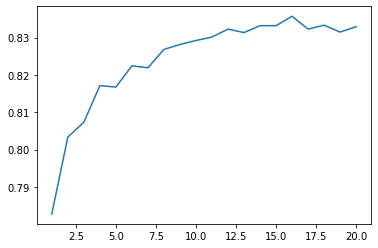

In [81]:
k_list=[k for k in range(1,21)]
plt.plot(k_list,accuracy_list)
plt.show()

In [82]:
kn=KNeighborsClassifier(n_neighbors=16).fit(train_norm,y_train)

In [83]:
len(k_list)
print(len(accuracy_list))

20


In [84]:
#aic
AIC_score(y_valid,kn.predict(valid_norm),df=len(valid_norm.columns)+1)

7853.006425432075

In [85]:
from sklearn.metrics import f1_score

In [86]:
#knn-f1 score
print('f1 score for k-NN is '+str(f1_score(y_valid,kn.predict(valid_norm))))

f1 score for k-NN is 0.6322350845948352


In [87]:
#classification matrix for validation set (k-NN)
classificationSummary(y_valid,kn.predict(valid_norm))

Confusion Matrix (Accuracy 0.8357)

       Prediction
Actual    0    1
     0 5237  491
     1  748 1065


In [91]:
from sklearn.model_selection import cross_val_score

In [92]:
#k-fold cross validation
print({'cross val score for kNN is ':cross_val_score(kn,train_norm,y_train,cv=5)})

{'cross val score for kNN is ': array([0.81723757, 0.83045977, 0.82869142, 0.82979664, 0.83045977])}


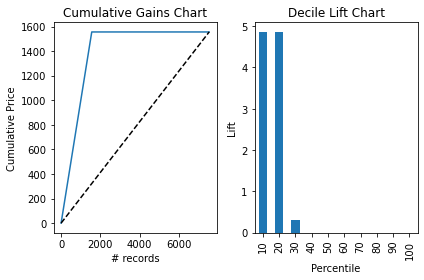

In [93]:
pred_v = pd.Series(kn.predict(valid_norm))
pred_v = pred_v.sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains Chart')
ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show()

# **Naive bayes**

In [95]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB

In [96]:
nb=MultinomialNB(alpha=0.01)
nb.fit(x_train,y_train)

MultinomialNB(alpha=0.01)

In [97]:
#predicting probabilities
train_prob=nb.predict_proba(x_train)
valid_prob=nb.predict_proba(x_valid)

In [98]:
#classmembership
y_validpred=pd.DataFrame(nb.predict(x_valid))

In [99]:
from dmba import classificationSummary
print({'classification summary of training set:\n': classificationSummary(y_train,nb.predict(x_train))})
print({'classification summary of validation set:\n': classificationSummary(y_valid,nb.predict(x_valid))})

Confusion Matrix (Accuracy 0.7504)

       Prediction
Actual     0     1
     0 16415   511
     1  5135   560
{'classification summary of training set:\n': None}
Confusion Matrix (Accuracy 0.7593)

       Prediction
Actual    0    1
     0 5549  179
     1 1636  177
{'classification summary of validation set:\n': None}


In [100]:
#aic
print(AIC_score(y_valid,nb.predict(x_valid),df=len(x_train.columns)+1))

10732.015928923502


In [101]:
#f1_score
print('f1 score for Naive bayes is '+str(f1_score(y_valid,nb.predict(x_valid))))

f1 score for Naive bayes is 0.16320885200553248


In [102]:
#cross val score
print({'the cross val score for NB is ':cross_val_score(nb,x_train,y_train,cv=5)})

{'the cross val score for NB is ': array([0.7518232 , 0.74955791, 0.75110522, 0.75243148, 0.74712644])}


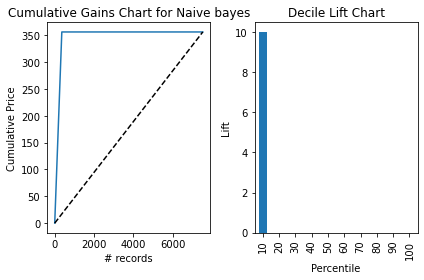

In [103]:
pred_v = pd.Series(nb.predict(x_valid))
pred_v = pred_v.sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains Chart for Naive bayes')
ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show()

# **Decision Tree**

In [104]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [105]:
dec_tree=DecisionTreeClassifier(random_state=0)

In [106]:
df_cleaned_dummy=pd.get_dummies(df_cleaned)
x=['age', 'education.num', 'capital.loss', 'hours.per.week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital.status_Divorced',
       'marital.status_Married-AF-spouse', 'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving', 'sex_Female',
       'sex_Male']
y='Income Status'

In [107]:
dx_train,dx_valid,dy_train,dy_valid=train_test_split(df_cleaned_dummy[x],df_cleaned_dummy[y],test_size=0.25,random_state=4)

In [108]:
#scaling the entire dataset
scaled_df=pd.DataFrame(scale.transform(df_cleaned_dummy[x]),columns=df_cleaned_dummy[x].columns)

In [109]:
#segregating the train and test data
dtrain_norm=scaled_df.iloc[dx_train.index]
dvalid_norm=scaled_df.iloc[dx_valid.index]

In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
#fitting the decision tree
dec_tree.fit(dtrain_norm,dy_train)
print(cross_val_score(dec_tree,dtrain_norm,dy_train,cv=5))

[0.79558011 0.78116711 0.78669319 0.78558798 0.78603006]


In [112]:
#plotting the tree
#plt.figure(figsize=(10,10))
#tree.plot_tree(dec_tree,feature_names=x,class_names=x,filled=True)
#plt.show()

In [113]:
print({'classification summary of training set:\n': classificationSummary(dy_train,nb.predict(dtrain_norm))})
print({'classification summary of validation set:\n': classificationSummary(dy_valid,nb.predict(dvalid_norm))})

Confusion Matrix (Accuracy 0.6958)

       Prediction
Actual     0     1
     0 10913  6013
     1   869  4826
{'classification summary of training set:\n': None}
Confusion Matrix (Accuracy 0.6974)

       Prediction
Actual    0    1
     0 3732 1996
     1  286 1527
{'classification summary of validation set:\n': None}


In [114]:
#aic
AIC_score(dy_valid,dec_tree.predict(dvalid_norm),df=len(dtrain_norm.columns)+1)

9676.824572167998

In [115]:
#f1 score
print('f1 score for decision trees is '+str(f1_score(dy_valid,dec_tree.predict(dvalid_norm))))

f1 score for decision trees is 0.5584778959149412


In [116]:
new_recdec=scaled_df.iloc[20]
new_recdecdf=pd.DataFrame(new_recdec).transpose()
dec_tree.predict(new_recdecdf)

array([0], dtype=int64)

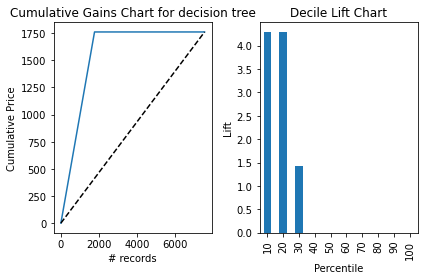

In [135]:
pred_v = pd.Series(dec_tree.predict(dvalid_norm))
pred_v = pred_v.sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains Chart for decision tree')
ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show()

# **Logistic regression**

In [118]:
df_cleaned_dummy.head()

,age,education.num,capital.loss,hours.per.week,Income Status,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,sex_Female,sex_Male
0,82,9,4356,18,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,54,4,3900,40,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,41,10,3900,40,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,34,9,3770,45,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,38,6,3770,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [119]:
#standardizing the data
scale=StandardScaler()

In [120]:
train_x,test_x,train_y,test_y=train_test_split(df_cleaned_dummy[x],df_cleaned_dummy[y],test_size=0.25,random_state=1) 

In [121]:
scale.fit(train_x) #capturing the mean and variance of training data

StandardScaler()

In [122]:
#scaling the data since huge difference in ranges of the variables in the dataset
scaled_data=pd.DataFrame(scale.transform(df_cleaned_dummy[x]),columns=df_cleaned_dummy[x].columns)

In [123]:
train_stan=scaled_data.iloc[train_x.index]
test_stan=scaled_data.iloc[test_x.index]

In [124]:
#fitting the logistic regression model over the data
logit_full = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_full.fit(train_stan,train_y)

LogisticRegression(C=1e+42, solver='liblinear')

In [125]:
#printing the y-intercept, coefficients of logit and the AIC_score of the model
print('intercept: \n ',logit_full.intercept_)
print('\n coefficients are \n')
print(pd.DataFrame((logit_full.coef_),columns=df_cleaned_dummy[x].columns))
print('\n AIC Score '+str(AIC_score(test_y,logit_full.predict(test_stan),df=len(df_cleaned_dummy[x].columns)+1)))

intercept: 
  [-1.94913219]

 coefficients are 

        age  education.num  capital.loss  hours.per.week  \
0  0.385297       0.741275      0.205887        0.353913   

   workclass_Federal-gov  workclass_Local-gov  workclass_Private  \
0               0.093614            -0.029652           0.037797   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  workclass_State-gov  \
0                0.063774                   -0.089539            -0.044034   

   ...  occupation_Machine-op-inspct  occupation_Other-service  \
0  ...                     -0.082041                 -0.271535   

   occupation_Priv-house-serv  occupation_Prof-specialty  \
0                   -0.555792                   0.184773   

   occupation_Protective-serv  occupation_Sales  occupation_Tech-support  \
0                    0.097522          0.094074                 0.113707   

   occupation_Transport-moving  sex_Female  sex_Male  
0                    -0.036203   -0.047917  0.047917  

[1 rows x 34 colum

In [126]:
#confusion matrix of test data-logistic regression
classificationSummary(test_y,logit_full.predict((test_stan)))

Confusion Matrix (Accuracy 0.8299)

       Prediction
Actual    0    1
     0 5187  453
     1  830 1071


In [127]:
#f1 score
print('f1 score for logistic reg is '+str(f1_score(test_y,logit_full.predict((test_stan)))))

f1 score for logistic reg is 0.6254014598540145


In [128]:
#cross val score
print({'cross val score for logistic': cross_val_score(logit_full,train_stan,train_y,cv=5)})

{'cross val score for logistic': array([0.83226519, 0.82051282, 0.83377542, 0.83045977, 0.83576481])}


In [129]:
#new rec
new_reclog=scaled_data.iloc[20]
new_reclogdf=pd.DataFrame(new_reclog).transpose()
new_reclogdf

,age,education.num,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,sex_Female,sex_Male
20,-0.414749,-3.179237,6.289417,-0.740647,-0.180533,-0.272627,0.592786,-0.192463,-0.298352,-0.207642,...,-0.265637,-0.346756,-0.069262,-0.391246,-0.14802,-0.368925,-0.173764,-0.236164,-0.695649,0.695649


In [130]:
#prediction:0 actual 0
logit_full.predict(new_reclogdf)

array([0], dtype=int64)

In [137]:
#performance comparison of all the models
accuracy_dict={'kNN':0.8356,'Naive Bayes':0.7593,'Decision Tree':0.6974,'Logistic_Reg':0.8299,
              'Neural Nets':0.8386}
AIC_dict={'kNN':7979.748,'Naive Bayes':10732.015,'Decision Tree':9676.82,'Logistic_Reg':8116.16,
         'Neural Nets':7717.9}

Text(0, 0.5, 'log(Accuracy)')

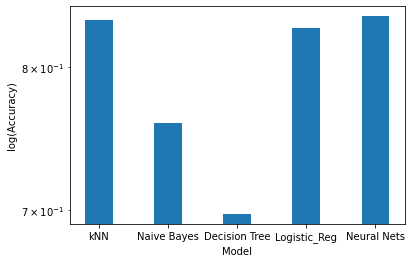

In [138]:
#Model accuracy comparison 
plt.bar(accuracy_dict.keys(),accuracy_dict.values(),width=0.4,log=True)
plt.xlabel('Model')
plt.ylabel('log(Accuracy)')

Text(0, 0.5, 'AIC_score')

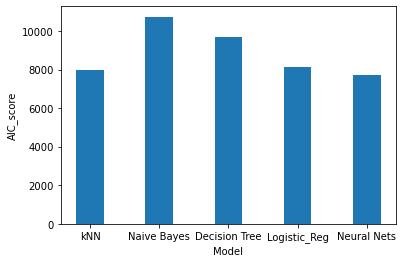

In [139]:
#AIC_score comparison for the models used throughout this project
plt.bar(AIC_dict.keys(),AIC_dict.values(),width=0.4)
plt.xlabel('Model')
plt.ylabel('AIC_score')

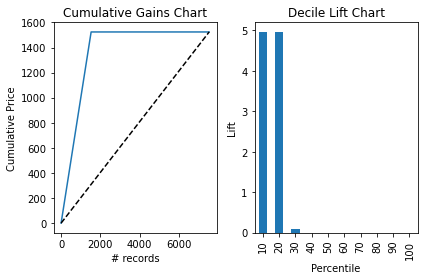

In [140]:
pred_v = pd.Series(logit_full.predict(test_stan))
pred_v = pred_v.sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains Chart')
ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show()

In [134]:
!pip install nbconvert[webpdf]

# Neural nets

In [162]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Income Status
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,0


In [163]:
from sklearn.preprocessing import MinMaxScaler

In [164]:
scale1=MinMaxScaler(feature_range=[-1,1])

In [165]:
df_cleaned_dummy.head()

,age,education.num,capital.loss,hours.per.week,Income Status,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,sex_Female,sex_Male
0,82,9,4356,18,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,54,4,3900,40,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,41,10,3900,40,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,34,9,3770,45,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,38,6,3770,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [166]:
df_scaled_dummy=pd.DataFrame(scale1.fit_transform(df_cleaned_dummy[x]),columns=x)

In [167]:
df_scaled_dummy.head()

,age,education.num,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,sex_Female,sex_Male
0,0.780822,0.066667,1.000000,-0.653061,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
1,0.013699,-0.600000,0.790634,-0.204082,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
2,-0.342466,0.200000,0.790634,-0.204082,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
3,-0.534247,0.066667,0.730946,-0.102041,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
4,-0.424658,-0.333333,0.730946,-0.204082,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0


In [168]:
ntrain_x,ntest_x,ntrain_y,ntest_y=train_test_split(scaled_df,df['Income Status'],test_size=0.25,random_state=1)

In [169]:
scaled_x_train=df_scaled_dummy.iloc[ntrain_x.index]
scaled_x_test=df_scaled_dummy.iloc[ntest_x.index]

In [170]:
clf=MLPClassifier(hidden_layer_sizes=3,activation='logistic',solver='lbfgs',random_state=1,max_iter=2000)

In [171]:
clf.fit(scaled_x_train,ntrain_y)

MLPClassifier(activation='logistic', hidden_layer_sizes=3, max_iter=2000,
              random_state=1, solver='lbfgs')

In [172]:
scaled_x_train.head()

,age,education.num,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,sex_Female,sex_Male
29793,-0.150685,0.466667,-1.0,0.000000,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
26134,-0.424658,0.066667,-1.0,0.204082,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0
18992,-0.041096,0.200000,-1.0,-0.306122,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
17605,-0.835616,0.200000,-1.0,-0.836735,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0
21894,-0.205479,0.066667,-1.0,-0.204082,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0


In [173]:
clf.predict(scaled_x_test)

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [174]:
df['Income Status'].unique()

array([0, 1], dtype=int64)

In [175]:
print('confusion matrix on test data-neural nets\n')
classificationSummary(ntest_y,clf.predict(scaled_x_test),class_names=['<50','>50K'])

confusion matrix on test data-neural nets

Confusion Matrix (Accuracy 0.8386)

       Prediction
Actual  <50 >50K
   <50 5195  445
  >50K  772 1129


In [176]:
from dmba.metric import AIC_score

In [177]:
AIC_score(ntest_y,clf.predict(scaled_x_test),df=len(scaled_df.columns)+1)

7717.903463285653

In [178]:
#f1_Score
print('f1 score for the neuural nets is '+str(f1_score(ntest_y,clf.predict(scaled_x_test))))

f1 score for the neuural nets is 0.6497841726618705


In [179]:
#cross val score
print({'cross val score': cross_val_score(clf,scaled_x_train,ntrain_y,cv=5)})

{'cross val score': array([0.84044199, 0.8260389 , 0.83687003, 0.83598585, 0.83465959])}


In [180]:
new_rec=df_scaled_dummy.iloc[20]
df_cleaned_dummy['Income Status'].iloc[20] #actual 0
new_recdf=pd.DataFrame(new_rec).transpose()

In [181]:
new_rec

age                                    -0.561644
education.num                          -0.866667
capital.loss                            0.195133
hours.per.week                         -0.367347
workclass_Federal-gov                  -1.000000
workclass_Local-gov                    -1.000000
workclass_Private                       1.000000
workclass_Self-emp-inc                 -1.000000
workclass_Self-emp-not-inc             -1.000000
workclass_State-gov                    -1.000000
workclass_Without-pay                  -1.000000
marital.status_Divorced                -1.000000
marital.status_Married-AF-spouse       -1.000000
marital.status_Married-civ-spouse       1.000000
marital.status_Married-spouse-absent   -1.000000
marital.status_Never-married           -1.000000
marital.status_Separated               -1.000000
marital.status_Widowed                 -1.000000
occupation_Adm-clerical                -1.000000
occupation_Armed-Forces                -1.000000
occupation_Craft-rep

In [182]:
clf.predict(new_recdf) #classified as 0

array([0], dtype=int64)

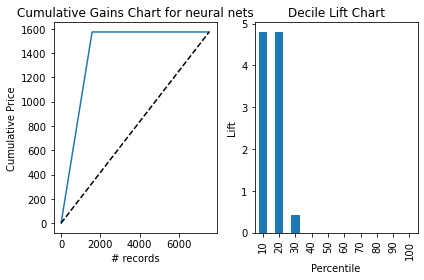

In [184]:
pred_v = pd.Series(clf.predict(scaled_x_test))
pred_v = pred_v.sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains Chart for neural nets')
ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show()

# f1_score comparison

In [ ]:
f1_dict={'kNN':0.6322,'Naive Bayes':0.1632,'Decision Tree':0.5584,'Logistic_Reg':0.6254,
              'Neural Nets':0.6497}

In [ ]:
#F1_score comparison for the models used throughout this project
plt.bar(f1_dict.keys(),f1_dict.values(),width=0.4)
plt.xlabel('Model')
plt.ylabel('F1_score')

# decile lift and gains chart for the models